In [ ]:
from google.colab import drive
import os
import sys
import pandas as pd
import numpy as np
import gym
drive.mount('/content/drive/',force_remount=True)
#helper directory
sys.path.insert(0,'/content/drive/MyDrive/BackUp_RL_CodeBase/helpers')
#file directory
os.chdir('/content/drive/MyDrive/BackUp_RL_CodeBase/')

#small helpers
import config
from helperFunction import data_split,splitByRatio  
from helperFunction import get_attributes,get_method


Mounted at /content/drive/


In [ ]:
# read data for environment
df=pd.read_pickle("Input/D_cleanInput.pkl")
df=df.sort_values(['tic','date'],ignore_index=True) # 218564 rows × 19 columns

In [ ]:
# splitting data
train_s = '2016-12-31' # input1
train_e = '2017-12-31' # input2
test_s = train_e
test_e = '2018-12-31' # input3
train = data_split(df, train_s,train_e) # index resetted
test = data_split(df, test_s,test_e) # index resetted

# Momentum factor search

## Lagged returns and volume change

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

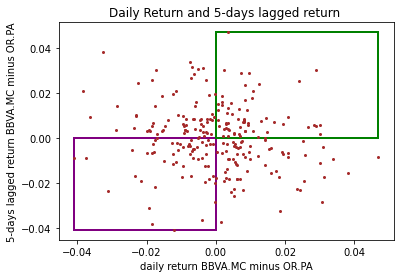

In [ ]:
period = 5
pct = train.pivot(columns='tic',values='close',index='date').pct_change().dropna()
lagged = pct.shift(periods=period).dropna()
# select assets
ticker =['BBVA.MC']
ticker1=['OR.PA']
a=pd.DataFrame(pct[ticker].values -pct[ticker1].values,index=pct[ticker].index.tolist(),columns=['Dif']).dropna()[period+1:]
c=pd.DataFrame(lagged[ticker].values - lagged[ticker1].values,index=lagged[ticker].index.tolist(),columns=['Dif'])[1:]
plt.plot(a,c,'o',markersize=2, color='brown')
plt.xlabel('daily return BBVA.MC minus OR.PA')
plt.ylabel(f'{period}-days lagged return BBVA.MC minus OR.PA')
plt.title(f'Daily Return and {period}-days lagged return ')
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((a.min(),c.min()),abs(a.min().item()),abs(c.min().item()), fill = False,color = "purple",linewidth = 2)
rect1=mpatches.Rectangle((0,0),abs(a.max().item()),abs(c.max().item()), fill = False,color = "green",linewidth = 2)		
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)

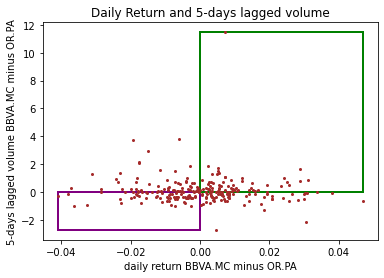

In [ ]:
period = 5
pct = train.pivot(columns='tic',values='close',index='date').pct_change().dropna()
volume = train.pivot(columns='tic',values='volume',index='date').pct_change().dropna()
lagged_volume = volume.shift(periods=period).dropna()
# select assets
ticker =['BBVA.MC']
ticker1=['OR.PA']
a=pd.DataFrame(pct[ticker].values -pct[ticker1].values,index=pct[ticker].index.tolist(),columns=['Dif']).dropna()[period+1:]
c=pd.DataFrame(lagged_volume[ticker].values - lagged_volume[ticker1].values,index=lagged_volume[ticker].index.tolist(),columns=['Volme_pct'])[1:] # lagged
plt.plot(a,c,'o',markersize=2, color='brown')
plt.xlabel('daily return BBVA.MC minus OR.PA')
plt.ylabel(f'{period}-days lagged volume BBVA.MC minus OR.PA')
plt.title(f'Daily Return and {period}-days lagged volume')
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((a.min(),c.min()),abs(a.min().item()),abs(c.min().item()), fill = False,color = "purple",linewidth = 2)
rect1=mpatches.Rectangle((0,0),abs(a.max().item()),abs(c.max().item()), fill = False,color = "green",linewidth = 2)		
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)

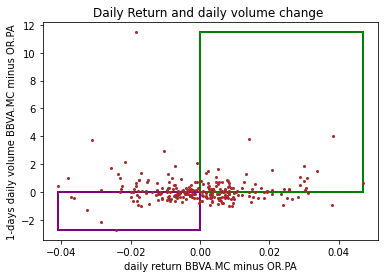

In [ ]:
pct = train.pivot(columns='tic',values='close',index='date').pct_change().dropna()
volume = train.pivot(columns='tic',values='volume',index='date').pct_change().dropna()
# select assets
ticker =['BBVA.MC']
ticker1=['OR.PA']
a=pd.DataFrame(pct[ticker].values -pct[ticker1].values,index=pct[ticker].index.tolist(),columns=['Dif'])
c=pd.DataFrame(volume[ticker].values - volume[ticker1].values,index=volume[ticker].index.tolist(),columns=['Volme_pct'])
plt.plot(a,c,'o',markersize=2, color='brown')
plt.xlabel('daily return BBVA.MC minus OR.PA')
plt.ylabel(f'{period}-days daily volume BBVA.MC minus OR.PA')
plt.title('Daily Return and daily volume change ')
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((a.min(),c.min()),abs(a.min().item()),abs(c.min().item()), fill = False,color = "purple",linewidth = 2)
rect1=mpatches.Rectangle((0,0),abs(a.max().item()),abs(c.max().item()), fill = False,color = "green",linewidth = 2)		
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)

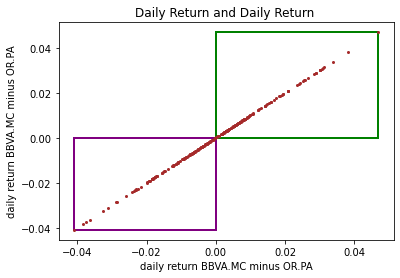

In [ ]:
# select assets
ticker =['BBVA.MC']
ticker1=['OR.PA']
a=pd.DataFrame(pct[ticker].values -pct[ticker1].values,index=pct[ticker].index.tolist(),columns=['Dif']).dropna()[period+1:]
c=pd.DataFrame(lagged[ticker].values - lagged[ticker1].values,index=lagged[ticker].index.tolist(),columns=['Dif'])[1:]
plt.plot(a,a,'o',markersize=2, color='brown')
plt.xlabel('daily return BBVA.MC minus OR.PA')
plt.ylabel('daily return BBVA.MC minus OR.PA')
plt.title('Daily Return and Daily Return ')
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((a.min(),c.min()),abs(a.min().item()),abs(c.min().item()), fill = False,color = "purple",linewidth = 2)
rect1=mpatches.Rectangle((0,0),abs(a.max().item()),abs(c.max().item()), fill = False,color = "green",linewidth = 2)		
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)

## Position wise 

###close/K-period High

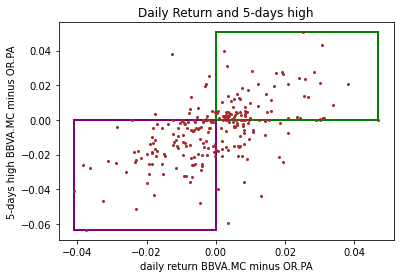

In [ ]:
lookback = 5
#OHLC
close =train.pivot(columns='tic',values='close',index='date')
open =train.pivot(columns='tic',values='open',index='date')
high =train.pivot(columns='tic',values='high',index='date')
low =train.pivot(columns='tic',values='low',index='date')
#rolling
rollinghigh = close.rolling(window=lookback).max()
rollinglow = close.rolling(window=lookback).min()
rollingmean = close.rolling(window=lookback).mean()
rollingstd= close.rolling(window=lookback).std()
# serie
pct = train.pivot(columns='tic',values='close',index='date').pct_change().dropna()
position = close/rollinghigh
# select assets
ticker =['BBVA.MC']
ticker1=['OR.PA']
a=pd.DataFrame(pct[ticker].values -pct[ticker1].values,index=pct[ticker].index.tolist(),columns=['Dif']).dropna()[lookback-2:]
c=pd.DataFrame(position[ticker].values - position[ticker1].values,index=position[ticker].index.tolist(),columns=['position']).dropna()
# plotting the chart
plt.plot(a,c,'o',markersize=2, color='brown' ,label ='close')
plt.xlabel('daily return BBVA.MC minus OR.PA')
plt.ylabel(f'{lookback}-days high BBVA.MC minus OR.PA')
plt.title(f'Daily Return and {lookback}-days high')
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((a.min(),c.min()),abs(a.min().item()),abs(c.min().item()), fill = False,color = "purple",linewidth = 2)
rect1=mpatches.Rectangle((0,0),abs(a.max().item()),abs(c.max().item()), fill = False,color = "green",linewidth = 2)		
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)

regression score: 0.3039242556615751, beta:[[0.65572012]], alpha: [-0.00565219]


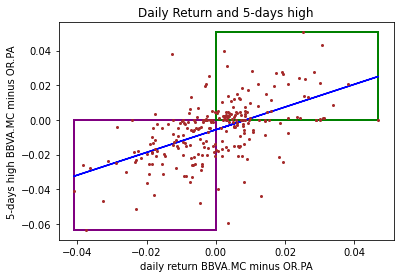

In [ ]:
from sklearn.linear_model import LinearRegression
X = a
y = c
reg = LinearRegression().fit(X, y)
print(f'regression score: {reg.score(X, y)}, beta:{reg.coef_}, alpha: {reg.intercept_}')
reg.score(X,y)
yHat  = reg.predict(X)
fitting = X.copy()
fitting['line'] = yHat
# select assets
ticker =['BBVA.MC']
ticker1=['OR.PA']
a=pd.DataFrame(pct[ticker].values -pct[ticker1].values,index=pct[ticker].index.tolist(),columns=['Dif']).dropna()[lookback-2:]
c=pd.DataFrame(position[ticker].values - position[ticker1].values,index=position[ticker].index.tolist(),columns=['position']).dropna() # lagged
plt.plot(fitting.Dif,fitting.line,markersize=2,color='blue')
plt.plot(a,c,'o',markersize=2, color='brown')
plt.xlabel('daily return BBVA.MC minus OR.PA')
plt.ylabel(f'{lookback}-days high BBVA.MC minus OR.PA')
plt.title(f'Daily Return and {lookback}-days high')
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((a.min(),c.min()),abs(a.min().item()),abs(c.min().item()), fill = False,color = "purple",linewidth = 2)
rect1=mpatches.Rectangle((0,0),abs(a.max().item()),abs(c.max().item()), fill = False,color = "green",linewidth = 2)		
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)

###close/K-period Low

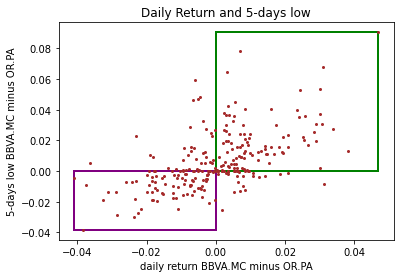

In [ ]:
lookback = 5
close =train.pivot(columns='tic',values='close',index='date')
open =train.pivot(columns='tic',values='close',index='date')
rollinghigh = close.rolling(window=lookback).max()
rollinglow = close.rolling(window=lookback).min()
rollingmean = close.rolling(window=lookback).mean()
rollingstd= close.rolling(window=lookback).std()
# serie
pct = train.pivot(columns='tic',values='close',index='date').pct_change().dropna()
position = open/rollinglow
# select assets
ticker =['BBVA.MC']
ticker1=['OR.PA']
a=pd.DataFrame(pct[ticker].values -pct[ticker1].values,index=pct[ticker].index.tolist(),columns=['Dif']).dropna()[lookback-2:]
c=pd.DataFrame(position[ticker].values - position[ticker1].values,index=position[ticker].index.tolist(),columns=['position']).dropna() # lagged
plt.plot(a,c,'o',markersize=2, color='brown')
plt.xlabel('daily return BBVA.MC minus OR.PA')
plt.ylabel(f'{lookback}-days low BBVA.MC minus OR.PA')
plt.title(f'Daily Return and {lookback}-days low')
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((a.min(),c.min()),abs(a.min().item()),abs(c.min().item()), fill = False,color = "purple",linewidth = 2)
rect1=mpatches.Rectangle((0,0),abs(a.max().item()),abs(c.max().item()), fill = False,color = "green",linewidth = 2)		
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)

###close/K-period Average, Std

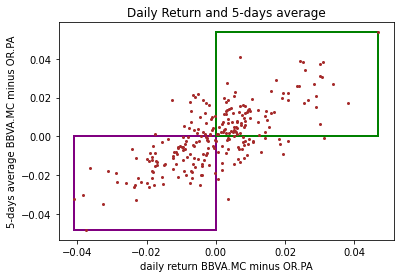

In [ ]:
lookback = 5
close =train.pivot(columns='tic',values='close',index='date')
open =train.pivot(columns='tic',values='close',index='date')
rollinghigh = close.rolling(window=lookback).max()
rollinglow = close.rolling(window=lookback).min()
rollingmean = close.rolling(window=lookback).mean()
rollingstd= close.rolling(window=lookback).std()
# serie
pct = train.pivot(columns='tic',values='close',index='date').pct_change().dropna()
position = open/rollingmean
# select assets
ticker =['BBVA.MC']
ticker1=['OR.PA']
a=pd.DataFrame(pct[ticker].values -pct[ticker1].values,index=pct[ticker].index.tolist(),columns=['Dif']).dropna()[lookback-2:]
c=pd.DataFrame(position[ticker].values - position[ticker1].values,index=position[ticker].index.tolist(),columns=['position']).dropna() # lagged
plt.plot(a,c,'o',markersize=2, color='brown')
plt.xlabel('daily return BBVA.MC minus OR.PA')
plt.ylabel(f'{lookback}-days average BBVA.MC minus OR.PA')
plt.title(f'Daily Return and {lookback}-days average')
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((a.min(),c.min()),abs(a.min().item()),abs(c.min().item()), fill = False,color = "purple",linewidth = 2)
rect1=mpatches.Rectangle((0,0),abs(a.max().item()),abs(c.max().item()), fill = False,color = "green",linewidth = 2)		
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)

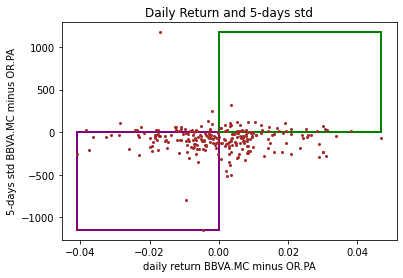

In [ ]:
lookback = 5
close =train.pivot(columns='tic',values='close',index='date')
open =train.pivot(columns='tic',values='close',index='date')
rollinghigh = close.rolling(window=lookback).max()
rollinglow = close.rolling(window=lookback).min()
rollingmean = close.rolling(window=lookback).mean()
rollingstd= close.rolling(window=lookback).std()
# serie
pct = train.pivot(columns='tic',values='close',index='date').pct_change().dropna()
position = open/rollingstd
# select assets
ticker =['BBVA.MC']
ticker1=['OR.PA']
a=pd.DataFrame(pct[ticker].values -pct[ticker1].values,index=pct[ticker].index.tolist(),columns=['Dif']).dropna()[lookback-2:]
c=pd.DataFrame(position[ticker].values - position[ticker1].values,index=position[ticker].index.tolist(),columns=['position']).dropna() # lagged
plt.plot(a,c,'o',markersize=2, color='brown')
plt.xlabel('daily return BBVA.MC minus OR.PA')
plt.ylabel(f'{lookback}-days std BBVA.MC minus OR.PA')
plt.title(f'Daily Return and {lookback}-days std')
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((a.min(),c.min()),abs(a.min().item()),abs(c.min().item()), fill = False,color = "purple",linewidth = 2)
rect1=mpatches.Rectangle((0,0),abs(a.max().item()),abs(c.max().item()), fill = False,color = "green",linewidth = 2)		
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)

# Testing

In [ ]:
lookback = 5
#OHLC
close =train.pivot(columns='tic',values='close',index='date')
open =train.pivot(columns='tic',values='open',index='date')
high =train.pivot(columns='tic',values='high',index='date')
low =train.pivot(columns='tic',values='low',index='date')
#rolling
rollinghigh = close.rolling(window=lookback).max()
rollinglow = close.rolling(window=lookback).min()
rollingmean = close.rolling(window=lookback).mean()
rollingstd= close.rolling(window=lookback).std()
# serie
pct = train.pivot(columns='tic',values='close',index='date').pct_change().dropna()
position = close/rollinghigh
# select assets
ticker =['BBVA.MC']
ticker1=['OR.PA']
a=pd.DataFrame(pct[ticker].values -pct[ticker1].values,index=pct[ticker].index.tolist(),columns=['Dif']).dropna()[lookback-2:]
c=pd.DataFrame(position[ticker].values - position[ticker1].values,index=position[ticker].index.tolist(),columns=['position']).dropna()


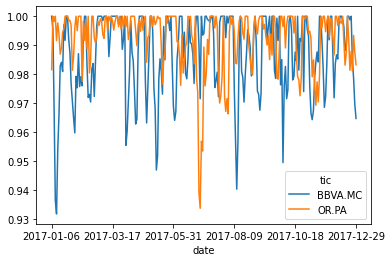

In [ ]:
position[['BBVA.MC','OR.PA']].dropna().plot()

## Weight

In [ ]:
# weight


In [ ]:
# plotting the chart
plt.plot(a,c,'o',markersize=2, color='brown' ,label ='close')
plt.xlabel('daily return BBVA.MC minus OR.PA')
plt.ylabel(f'{lookback}-days high BBVA.MC minus OR.PA')
plt.title(f'Daily Return and {lookback}-days high')
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((a.min(),c.min()),abs(a.min().item()),abs(c.min().item()), fill = False,color = "purple",linewidth = 2)
rect1=mpatches.Rectangle((0,0),abs(a.max().item()),abs(c.max().item()), fill = False,color = "green",linewidth = 2)		
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)